# Building a Neural Network from Scratch

ANU ML Reading Group, 04/12/2023 

Reference: 

- Deep Learning from Scratch by Saitoh Koki (O'Reilly Japan, 2016)

- Deep Learning with Python by Francois Chollet (Manning, 2021)

- deep learning $\approx$ layered representation learning

- learning $\approx$ finding a set of values for the weights of all layers in a network

In [1]:
import jax.numpy as jnp
import jax
jax.config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt

# Perceptron

<div>
<img src="images/perceptron1950.jpg" width="500"/>
<img src="images/simple_perceptron.png" width="300"/>
</div>

$$
y= \begin{cases}0 & \left(w_1 x_1+w_2 x_2 \leqslant \theta\right) \\ 1 & \left(w_1 x_1+w_2 x_2>\theta\right)\end{cases}
$$

In [2]:
def perceptron(x, w, θ):
    return int(jnp.dot(x, w) >= θ)

## Building Logic Gates with Perceptron

### AND gate

<div>
<img src="images/ANDGate.png" width="500"/>
</div>

In [3]:
# w1 = 0.5, w2 = 0.5, θ = 0.6
andGate = lambda x1, x2: perceptron(jnp.array([x1, x2]), jnp.array([0.5, 0.5]), 0.6)

In [4]:
andGate(0, 0), andGate(0, 1), andGate(1, 0), andGate(1, 1)

(0, 0, 0, 1)

### OR gate

<div>
<img src="images/orGate.png" width="500"/>
</div>

In [5]:
# w1 = 0.5, w2 = 0.5, θ = 0.1
orGate = lambda x1, x2: perceptron(jnp.array([x1, x2]), jnp.array([0.5, 0.5]), 0.1)

In [6]:
orGate(0, 0), orGate(0, 1), orGate(1, 0), orGate(1, 1)

(0, 1, 1, 1)

### Not AND Gate

<div>
<img src="images/NAND.png" width="500"/>
</div>

In [7]:
# w1 = -0.5, w2 = -0.5, θ = -0.6
nandGate = lambda x1, x2: perceptron(jnp.array([x1, x2]), jnp.array([-0.5, -0.5]), -0.6)

In [8]:
nandGate(0, 0), nandGate(0, 1), nandGate(1, 0), nandGate(1, 1)

(1, 1, 1, 0)

## Limitation of Perceptron 

### XOR Gate
<div>
<img src="images/xorGate.png" width="300"/>
<img src="images/xor2d.png" width="300"/>
<img src="images/xor2.png" width="500"/>
</div>

- We cannot build XOR gate with a single perceptron.
- But we can build XOR gate with two layers of perceptrons.

In [9]:
xorGate = lambda x1, x2: andGate(orGate(x1, x2), nandGate(x1, x2))

In [10]:
xorGate(0, 0), xorGate(0, 1), xorGate(1, 0), xorGate(1, 1)

(0, 1, 1, 0)

- We can build a computer only using two layers of perceptrons!
- Two layers of perceptrons (with sigmoid activation functions) can approximate any function.

# Neural Network

<div>
<img src="images/digital_class.png" width="500"/>
<img src="images/feed_back_loop.png" width="500"/>
<img src="images/three_layers.png" width="500"/>
</div>


## Activation Function
<div>
<img src="images/activation_function.png" width="500"/>
</div>


### sigmoid function

$$h(x)=\frac{1}{1+\exp (-x)}$$

In [11]:
sigmoid = lambda x: 1 / (1 + jnp.exp(-x))

### ReLU function
(rectified linear unit function)
$$
h(x)= \begin{cases}x & (x>0) \\ 0 & (x \leqslant 0)\end{cases}
$$

## Building a three-layer neural network

### input layer $→$  first layer

<div>
<img src="images/0to1.png" width="500"/>
</div>

$a_1^{(1)}=w_{11}^{(1)} x_1+w_{12}^{(1)} x_2+b_1^{(1)}$

$$
\boldsymbol{A}^{(1)}=\boldsymbol{X} \boldsymbol{W}^{(1)}+\boldsymbol{B}^{(1)}
$$

$$
\begin{aligned}
\boldsymbol{A}^{(1)} & =\left(\begin{array}{lll}
a_1^{(1)} & a_2^{(1)} & a_3^{(1)}
\end{array}\right), \boldsymbol{X}=\left(\begin{array}{ll}
x_1 & x_2
\end{array}\right), \boldsymbol{B}^{(1)}=\left(\begin{array}{lll}
b_1^{(1)} & b_2^{(1)} & b_3^{(1)}
\end{array}\right) \\
\boldsymbol{W}^{(1)} & =\left(\begin{array}{lll}
w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}
\end{array}\right)
\end{aligned}
$$

In [12]:
# example
X = jnp.array([1.0, 0.5])
W1 = jnp.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = jnp.array([0.1, 0.2, 0.3])

A1 = jnp.dot(X, W1) + B1
print(A1)

[0.3 0.7 1.1]


### first layer $→$ second layer

<div>
<img src="images/1to2.png" width="500"/>
</div>

In [13]:
Z1 = sigmoid(A1) # activation function

print("A1: ", A1)
print("Z1: ", Z1)

A1:  [0.3 0.7 1.1]
Z1:  [0.57444252 0.66818777 0.75026011]


In [14]:
W2 = jnp.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = jnp.array([0.1, 0.2])

A2 = jnp.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(Z2)

[0.62624937 0.7710107 ]


### second layer $→$ output layer

softmax function
$$
\begin{aligned}
y_k=\frac{\exp \left(a_k\right)}{\sum_{i=1}^n \exp \left(a_i\right)} & =\frac{\mathrm{C} \exp \left(a_k\right)}{\mathrm{C} \sum_{i=1}^n \exp \left(a_i\right)} \\
& =\frac{\exp \left(a_k+\log \mathrm{C}\right)}{\sum_{i=1}^n \exp \left(a_i+\log \mathrm{C}\right)} \\
& =\frac{\exp \left(a_k+\mathrm{C}^{\prime}\right)}{\sum_{i=1}^n \exp \left(a_i+\mathrm{C}^{\prime}\right)}
\end{aligned}
$$

In [15]:
def softmax(a):
    c = jnp.max(a)
    exp_a = jnp.exp(a - c) # prevent overflow
    sum_exp_a = jnp.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

In [16]:
W3 = jnp.array([[0.1, 0.3], [0.2, 0.4]])
B3 = jnp.array([0.1, 0.2])

A3 = jnp.dot(Z2, W3) + B3
Y = softmax(A3)
print(Y)

[0.40625907 0.59374093]


## Handwriting recognition and Forward Propagation

- MNIST dataset
- N = 60,000 training images
- N = 10,000 test images
- 0-9 digits (10 classes)
- 28x28 pixel images
- each pixel is a value between 0 and 255

In [17]:
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

x_train = jnp.array(x_train)
t_train = jnp.array(t_train)
x_test = jnp.array(x_test)
t_test = jnp.array(t_test)

Network shape

<div>
<img src="images/shape.png" width="500"/>
</div>

In [18]:
from PIL import Image
import numpy as np

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()


img = x_train[10]
label = t_train[10]

print(len(x_train))
print(len(x_test))

print(label) 
print(img.shape) # (784,)

img = img.reshape(28, 28)
print(img.shape) # (28, 28)

img_show(img) # show image

60000
10000
3
(784,)
(28, 28)


Assume we have learned the weights, and we want to predict the digit in the test set.

In [19]:
import pickle

with open("sample_weight.pkl", 'rb') as f:
    network = pickle.load(f) # load dictionary of weights

In [20]:
print(network['W1'].shape) # (784, 50)
print(network['b1'].shape) # (50,)
print(network['W2'].shape) # (50, 100)
print(network['b2'].shape) # (100,)
print(network['W3'].shape) # (100, 10)
print(network['b3'].shape) # (10,)

(784, 50)
(50,)
(50, 100)
(100,)
(100, 10)
(10,)


In [21]:
@jax.jit
def predict(network, x):
    a1 = jnp.dot(x, network['W1']) + network['b1']
    z1 = sigmoid(a1)
    a2 = jnp.dot(z1, network['W2']) + network['b2']
    z2 = sigmoid(a2)
    a3 = jnp.dot(z2, network['W3']) + network['b3']
    y = softmax(a3)
    return y

In [22]:
# check accuracy of prediction in test set

accuracy_cnt = 0
for i in range(len(x_test)):
    y = predict(network, x_test[i])
    p = jnp.argmax(y) # index of max value
    if p == t_test[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x_test)))

Accuracy:0.9207


### Batch Processing 

- The previous code is slow since we loop over 10,000 images one by one.
- We can speed up the code by processing the images in batches.

<div>
<img src="images/batch_shape.png" width="500"/>
</div>

In [23]:
batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x_test), batch_size):
    x_batch = x_test[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = jnp.argmax(y_batch, axis=1)
    accuracy_cnt += jnp.sum(p == t_test[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x_test)))

Accuracy:0.9207


# Learning from Data

## Cross Entropy Error

$$
E=-\sum_k t_k \log y_k
$$

- $t_k$ is 1 if the image is digit $k$, and 0 otherwise.

In [24]:
def cross_entropy_error(y, t, delta = 1e-7):
    return -np.sum(t * np.log(y + delta))

In [25]:
t = jnp.array([0, 1, 0])
y = jnp.array([0.1, 0.8, 0.1])
cross_entropy_error(y, t) # accurate prediction, low cross entropy error

Array(0.22314343, dtype=float64)

In [26]:
t = jnp.array([0, 1, 0])
y = jnp.array([0.1, 0.05, 0.85])
cross_entropy_error(y, t) # inaccurate prediction, high cross entropy error

Array(2.99573027, dtype=float64)

## Gradient Method

$$
\begin{aligned}
\boldsymbol{W} & =\left(\begin{array}{ccc}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23}
\end{array}\right) \\
\frac{\partial L}{\partial \boldsymbol{W}} & =\left(\begin{array}{ccc}
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & \frac{\partial L}{\partial w_{13}} \\
\frac{\partial L}{\partial w_{21}} & \frac{\partial L}{\partial w_{22}} & \frac{\partial L}{\partial w_{23}}
\end{array}\right)
\end{aligned}
$$

In [27]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [28]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # normal distribution

    def predict(self, x):
        return np.dot(x, self.W)
    
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)
        return loss

In [29]:
net = simpleNet()
print(net.W)

[[0.18758432 0.33019026 0.22054719]
 [1.45996212 0.96791294 0.99503241]]


In [30]:
x = jnp.array([0.6, 0.9])
t = jnp.array([0, 0, 1])
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
dW

array([[ 0.2530795 ,  0.17704837, -0.43012788],
       [ 0.37961926,  0.26557256, -0.64519182]])

## Simple Learning Algorithm (SGD)

1. Pick a mini-batch randomly from training set and feed it into the network to compute the loss function (w.r.t. the mini-batch itself).
2. Compute the gradient of the loss function with respect to the weights.
3. Update weights by subtracting a small fraction of the gradient from the weights.
4. Repeat 1-3 until the loss function converges and prevent over-fitting.

Let's try to train a simple two layer net!

In [31]:
# build the two layer class

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

# batch-version soft max
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) 
    return np.exp(x) / np.sum(np.exp(x))

# batch-version cross entropy error
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params["b1"] = np.zeros(hidden_size)
        self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params["b2"] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def gradient(self, x, t):
        W1, W2 = self.params["W1"], self.params["W2"]
        b1, b2 = self.params["b1"], self.params["b2"]
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num
        grads["W2"] = np.dot(z1.T, dy)
        grads["b2"] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads["W1"] = np.dot(x.T, dz1)
        grads["b1"] = np.sum(dz1, axis=0)

        return grads

In [32]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label = True)


train_loss_list = []
train_acc_list = []
test_acc_list = []


# hyper parameters
iters_num = 10000 # draw 10000 mini-batches
batch_size = 100
learning_rate = 0.1

# how many batches on average should we draw for training all the data set?
iter_per_epoch = len(x_train) / batch_size


network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

train_size = x_train.shape[0] # 60000 training samples

for i in range(iters_num):
    # draw mini-batch
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    # calculate gradient
    grad = network.gradient(x_batch, t_batch)
    # update weights and biases
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]


    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    # prediction accuracy for each epoch
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.7904, 0.7966
train acc, test acc | 0.8749, 0.879
train acc, test acc | 0.89805, 0.8996
train acc, test acc | 0.9072166666666667, 0.9099
train acc, test acc | 0.91315, 0.915
train acc, test acc | 0.9168833333333334, 0.9206
train acc, test acc | 0.9225666666666666, 0.9241
train acc, test acc | 0.9251833333333334, 0.9271
train acc, test acc | 0.9280333333333334, 0.9284
train acc, test acc | 0.93235, 0.9342
train acc, test acc | 0.9355, 0.9363
train acc, test acc | 0.9378833333333333, 0.9375
train acc, test acc | 0.9395333333333333, 0.9393
train acc, test acc | 0.9414166666666667, 0.9415
train acc, test acc | 0.9434166666666667, 0.9417
train acc, test acc | 0.9453, 0.9442


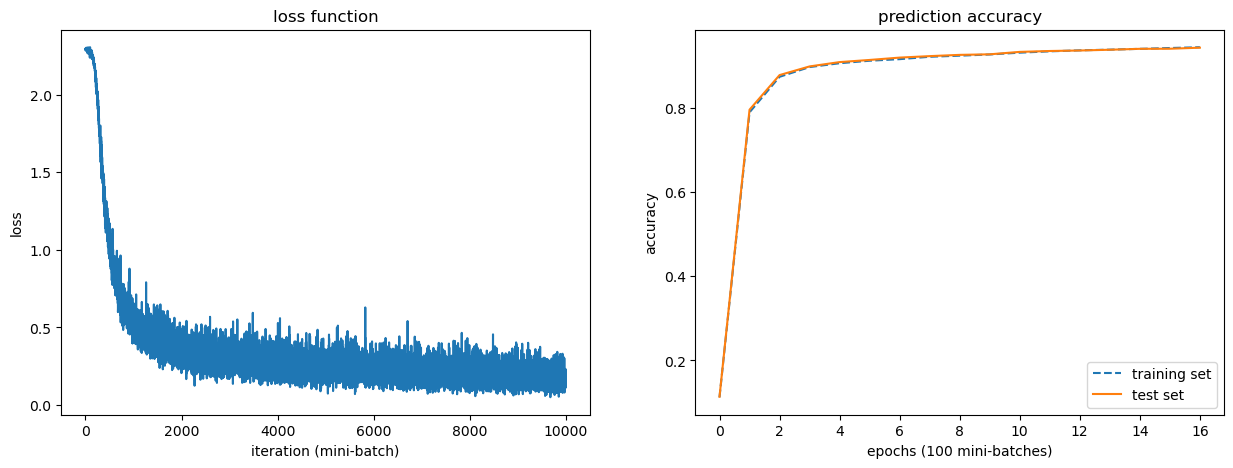

In [34]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(train_loss_list)
ax1.set_xlabel("iteration (mini-batch)")
ax1.set_ylabel("loss")
ax1.set_title("loss function")

ax2.plot(train_acc_list, '--', label="training set")
ax2.plot(test_acc_list, label="test set")
ax2.set_title("prediction accuracy")
ax2.set_xlabel("epochs (100 mini-batches)")
ax2.set_ylabel("accuracy")
ax2.legend()

plt.show()